In [2]:
#utilities
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#model building
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [4]:
matches = pd.read_csv('matchinfo.csv')
deliveries = pd.read_csv('all_matches.csv')
matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,winner_by_runs,winner_by_wickets,player_of_match,venue,umpire 1,umpire 2,tv-umpire,no_result,tie,result,dl-applied
0,1252666,2021,London,7/22/2021,Oval Invincibles,Manchester Originals,Manchester Originals,field,Oval Invincibles,9.0,NaN,SW Billings,"Kennington Oval, London",DJ Millns,MJ Saggers,NJ Llong,0,0,normal,0
1,1252667,2021,Birmingham,7/23/2021,London Spirit,Birmingham Phoenix,Birmingham Phoenix,field,Birmingham Phoenix,NaN,3.0,Z Crawley,"Edgbaston, Birmingham",GD Lloyd,RT Robinson,NL Bainton,0,0,normal,0
2,1252668,2021,Nottingham,7/24/2021,Southern Brave,Trent Rockets,Southern Brave,bat,Trent Rockets,NaN,9.0,M de Lange,"Trent Bridge,Nottingham",DJ Millns,RJ Warren,RT Robinson,0,0,normal,0
3,1252669,2021,Leeds,7/24/2021,Welsh Fire,Northern Superchargers,Northern Superchargers,field,Welsh Fire,5.0,NaN,Qais Ahmad,"Headingley, Leeds",NA Mallender,NJ Llong,MJ Saggers,0,0,normal,0
4,1252671,2021,Manchester,7/25/2021,Birmingham Phoenix,Manchester Originals,Birmingham Phoenix,bat,Manchester Originals,NaN,6.0,MW Parkinson,"Old Trafford, Manchester",AG Wharf,SJ O'Shaughnessy,NJ Llong,0,0,normal,0


In [5]:
deliveries.head()

,match_id,season,start_date,venue,over,innings,ball,batting_team,bowling_team,striker,...,wides,noballs,byes,legbyes,penalty,total-runs,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1252666,2021,7/22/2021,"Kennington Oval, London",1,1,0.1,Oval Invincibles,Manchester Originals,JJ Roy,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,1252666,2021,7/22/2021,"Kennington Oval, London",1,1,0.2,Oval Invincibles,Manchester Originals,JJ Roy,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2,1252666,2021,7/22/2021,"Kennington Oval, London",1,1,0.3,Oval Invincibles,Manchester Originals,SM Curran,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,1252666,2021,7/22/2021,"Kennington Oval, London",1,1,0.4,Oval Invincibles,Manchester Originals,SM Curran,...,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
4,1252666,2021,7/22/2021,"Kennington Oval, London",1,1,0.5,Oval Invincibles,Manchester Originals,SM Curran,...,NaN,NaN,NaN,NaN,NaN,0,bowled,SM Curran,NaN,NaN


In [6]:
matches.shape,deliveries.shape

((133, 20), (25342, 24))

In [7]:
matches.columns

Index(['id', 'season', 'city ', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'winner_by_runs', 'winner_by_wickets',
       'player_of_match', 'venue', 'umpire 1', 'umpire 2', 'tv-umpire',
       'no_result', 'tie', 'result', 'dl-applied'],
      dtype='object')

In [9]:
deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'over', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'total-runs', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed'],
      dtype='object')

In [10]:
len(deliveries)

25342

In [11]:
len(matches)

133

In [12]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 133 non-null    int64  
 1   season             133 non-null    int64  
 2   city               133 non-null    object 
 3   date               133 non-null    object 
 4   team1              133 non-null    object 
 5   team2              133 non-null    object 
 6   toss_winner        133 non-null    object 
 7   toss_decision      133 non-null    object 
 8   winner             125 non-null    object 
 9   winner_by_runs     63 non-null     float64
 10  winner_by_wickets  62 non-null     float64
 11  player_of_match    127 non-null    object 
 12  venue              133 non-null    object 
 13  umpire 1           133 non-null    object 
 14  umpire 2           133 non-null    object 
 15  tv-umpire          133 non-null    object 
 16  no_result          133 non

In [13]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25342 entries, 0 to 25341
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                25342 non-null  int64  
 1   season                  25342 non-null  int64  
 2   start_date              25342 non-null  object 
 3   venue                   25342 non-null  object 
 4   over                    25342 non-null  int64  
 5   innings                 25342 non-null  int64  
 6   ball                    25342 non-null  float64
 7   batting_team            25342 non-null  object 
 8   bowling_team            25342 non-null  object 
 9   striker                 25342 non-null  object 
 10  non_striker             25342 non-null  object 
 11  bowler                  25342 non-null  object 
 12  runs_off_bat            25342 non-null  int64  
 13  extras                  25342 non-null  int64  
 14  wides                   750 non-null  

In [14]:
matches.isnull().sum()

id                    0
season                0
city                  0
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                8
winner_by_runs       70
winner_by_wickets    71
player_of_match       6
venue                 0
umpire 1              0
umpire 2              0
tv-umpire             0
no_result             0
tie                   0
result                0
dl-applied            0
dtype: int64

In [15]:
deliveries.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
over                          0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     24592
noballs                   25140
byes                      25223
legbyes                   24878
penalty                   25342
total-runs                    0
wicket_type               23749
player_dismissed          23749
other_wicket_type         25342
other_player_dismissed    25342
dtype: int64

In [16]:
#creating a list of columns and removing unnecessary columns from the list
list1 = matches.columns.to_list()
remove_from_list = ['id', 'date', 'toss_winner', 'toss_decision', 'winner',
                    'winner_by_runs', 'player_of_match', 'venue',
                    'umpire 1', 'umpire 2', 'tv-umpire']

for i in range(len(remove_from_list)):
    list1.remove(remove_from_list[i])

In [17]:
for i in list1:
    print('The unique values in', i, 'are: ', matches[i].unique())

The unique values in season are:  [2021 2022 2023 2024]
The unique values in city  are:  ['London' 'Birmingham' 'Nottingham' 'Leeds' 'Manchester' 'Cardiff'
 'Southampton']
The unique values in team1 are:  ['Oval Invincibles' 'London Spirit' 'Southern Brave' 'Welsh Fire'
 'Birmingham Phoenix' 'Northern Superchargers' 'Trent Rockets'
 'Manchester Originals']
The unique values in team2 are:  ['Manchester Originals' 'Birmingham Phoenix' 'Trent Rockets'
 'Northern Superchargers' 'Southern Brave' 'London Spirit'
 'Oval Invincilbes' 'Welsh Fire']
The unique values in winner_by_wickets are:  [nan  3.  9.  6.  2.  4.  7.  5.  8.  1. 10.]
The unique values in no_result are:  [0 1]
The unique values in tie are:  [0 1]
The unique values in result are:  ['normal ' 'noresult' 'normal' 'tie']
The unique values in dl-applied are:  [0 1]


In [18]:
list2 = deliveries.columns.to_list()
remove_from_list2 = ['match_id', 'striker','innings', 'non_striker',
                     'bowler', 'player_dismissed']

for i in range(len(remove_from_list2)):
    list2.remove(remove_from_list2[i])

In [19]:
for i in list2:
    print('The unique values in', i, 'are: ', deliveries[i].unique())

The unique values in season are:  [2021 2022 2023 2024]
The unique values in start_date are:  ['7/22/2021' '7/23/2021' '7/24/2021' '7/25/2021' '7/26/2021' '7/27/2021'
 '7/30/2021' '7/29/2021' '7/31/2021' '8/1/2021' '8/2/2021' '8/3/2021'
 '8/4/2021' '8/5/2021' '8/6/2021' '8/7/2021' '8/8/2021' '8/9/2021'
 '8/10/2021' '8/11/2021' '8/12/2021' '8/13/2021' '8/14/2021' '8/15/2021'
 '8/16/2021' '8/17/2021' '8/18/2021' '8/20/2021' '8/21/2021' '8/3/2022'
 '8/4/2022' '8/5/2022' '8/6/2022' '8/7/2022' '8/8/2022' '8/9/2022'
 '8/10/2022' '8/11/2022' '8/12/2022' '8/13/2022' '8/14/2022' '8/15/2022'
 '8/16/2022' '8/17/2022' '8/18/2022' '8/19/2022' '8/20/2022' '8/21/2022'
 '8/22/2022' '8/23/2022' '8/24/2022' '8/25/2022' '8/26/2022' '8/27/2022'
 '8/28/2022' '8/29/2022' '8/30/2022' '8/31/2022' '9/2/2022' '9/3/2022'
 '8/1/2023' '8/2/2023' '8/3/2023' '8/4/2023' '8/5/2023' '8/6/2023'
 '8/7/2023' '8/8/2023' '8/9/2023' '8/10/2023' '8/11/2023' '8/12/2023'
 '8/13/2023' '8/14/2023' '8/15/2023' '8/16/2023' '8/17/20

In [20]:
totalrun_df=deliveries.groupby(['match_id','innings']).sum()['total-runs'].reset_index()

totalrun_df

,match_id,innings,total-runs
0,1252666,1,145
1,1252666,2,136
2,1252667,1,144
3,1252667,2,148
4,1252668,1,126
...,...,...,...
259,1417822,2,126
260,1417822,3,7
261,1417822,4,11
262,1417823,1,147


In [21]:
#capturing only the first innings, because we will be predicting the second innings
#Also we are changing total runs into targets by using the lambda function

totalrun_df = totalrun_df[totalrun_df['innings']==1]
totalrun_df.loc[:, 'total-runs'] = totalrun_df['total-runs'].apply(lambda x: x + 1)
#to get target
totalrun_df


,match_id,innings,total-runs
0,1252666,1,146
2,1252667,1,145
4,1252668,1,127
6,1252669,1,174
8,1252671,1,88
...,...,...,...
252,1417819,1,182
254,1417820,1,151
256,1417821,1,42
258,1417822,1,127


In [22]:
match_df = matches.merge(totalrun_df[['match_id','total-runs']],
                       left_on='id',right_on='match_id')

match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,winner_by_runs,...,venue,umpire 1,umpire 2,tv-umpire,no_result,tie,result,dl-applied,match_id,total-runs
0,1252666,2021,London,7/22/2021,Oval Invincibles,Manchester Originals,Manchester Originals,field,Oval Invincibles,9.0,...,"Kennington Oval, London",DJ Millns,MJ Saggers,NJ Llong,0,0,normal,0,1252666,146
1,1252667,2021,Birmingham,7/23/2021,London Spirit,Birmingham Phoenix,Birmingham Phoenix,field,Birmingham Phoenix,NaN,...,"Edgbaston, Birmingham",GD Lloyd,RT Robinson,NL Bainton,0,0,normal,0,1252667,145
2,1252668,2021,Nottingham,7/24/2021,Southern Brave,Trent Rockets,Southern Brave,bat,Trent Rockets,NaN,...,"Trent Bridge,Nottingham",DJ Millns,RJ Warren,RT Robinson,0,0,normal,0,1252668,127
3,1252669,2021,Leeds,7/24/2021,Welsh Fire,Northern Superchargers,Northern Superchargers,field,Welsh Fire,5.0,...,"Headingley, Leeds",NA Mallender,NJ Llong,MJ Saggers,0,0,normal,0,1252669,174
4,1252671,2021,Manchester,7/25/2021,Birmingham Phoenix,Manchester Originals,Birmingham Phoenix,bat,Manchester Originals,NaN,...,"Old Trafford, Manchester",AG Wharf,SJ O'Shaughnessy,NJ Llong,0,0,normal,0,1252671,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1417819,2024,Southampton,8/14/2024,Welsh Fire,Southern Brave,Welsh Fire,bat,NaN,NaN,...,"The Rose Bowl, Southampton",MJ Saggers,Rob White,NL Bainton,1,0,noresult,0,1417819,182
129,1417820,2024,Nottingham,8/14/2024,Oval Invincibles,Trent Rockets,Oval Invincibles,bat,Trent Rockets,NaN,...,"Trent Bridge,Nottingham",DJ Millns,ID Blackwell,NJ Llong,0,0,normal,0,1417820,151
130,1417821,2024,Birmingham,8/15/2024,Manchester Originals,Birmingham Phoenix,Birmingham Phoenix,field,Birmingham Phoenix,NaN,...,"Edgbaston, Birmingham",ID Blackwell,M Burns,PK Baldwin,0,0,normal,0,1417821,42
131,1417822,2024,London,8/17/2024,Southern Brave,Birmingham Phoenix,Birmingham Phoenix,field,NaN,NaN,...,"Kennington Oval, London",James Middlebrook,M Burns,NL Bainton,0,1,tie,0,1417822,127


In [23]:
match_df[match_df['dl-applied']==1].style.background_gradient(cmap = 'plasma')

c:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,winner_by_runs,winner_by_wickets,player_of_match,venue,umpire 1,umpire 2,tv-umpire,no_result,tie,result,dl-applied,match_id,total-runs
82,1355623,2023,Leeds,8/13/2023,Manchester Originals,Northern Superchargers,Manchester Originals,bat,Manchester Originals,40.000000,nan,J Overton,"Headingley, Leeds",DJ Millns,Tom Lungley,SJ O'Shaughnessy,0,0,normal,1,1355623,183
127,1417818,2024,Leeds,8/13/2024,London Spirit,Northern Superchargers,Northern Superchargers,field,Northern Superchargers,21.000000,nan,AU Rashid,"Headingley, Leeds",James Middlebrook,RJ Warren,J Naeem,0,0,normal,1,1417818,112


In [24]:
print(match_df.columns)

Index(['id', 'season', 'city ', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'winner_by_runs', 'winner_by_wickets',
       'player_of_match', 'venue', 'umpire 1', 'umpire 2', 'tv-umpire',
       'no_result', 'tie', 'result', 'dl-applied', 'match_id', 'total-runs'],
      dtype='object')


In [25]:
# ignoring the rows which were Duckworth lewis system

match_df = match_df[match_df['dl-applied']==0]

# considering the match_id, city, winner, and total runs

match_df = match_df[['match_id','city ','winner','total-runs']]

match_df

,match_id,city,winner,total-runs
0,1252666,London,Oval Invincibles,146
1,1252667,Birmingham,Birmingham Phoenix,145
2,1252668,Nottingham,Trent Rockets,127
3,1252669,Leeds,Welsh Fire,174
4,1252671,Manchester,Manchester Originals,88
...,...,...,...,...
128,1417819,Southampton,NaN,182
129,1417820,Nottingham,Trent Rockets,151
130,1417821,Birmingham,Birmingham Phoenix,42
131,1417822,London,NaN,127


In [26]:
#merging matchdf with deliveries on match_id

delivery_df = match_df.merge(deliveries,on='match_id')

delivery_df.head(5)

,match_id,city,winner,total-runs_x,season,start_date,venue,over,innings,ball,...,wides,noballs,byes,legbyes,penalty,total-runs_y,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1252666,London,Oval Invincibles,146,2021,7/22/2021,"Kennington Oval, London",1,1,0.1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,1252666,London,Oval Invincibles,146,2021,7/22/2021,"Kennington Oval, London",1,1,0.2,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2,1252666,London,Oval Invincibles,146,2021,7/22/2021,"Kennington Oval, London",1,1,0.3,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,1252666,London,Oval Invincibles,146,2021,7/22/2021,"Kennington Oval, London",1,1,0.4,...,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
4,1252666,London,Oval Invincibles,146,2021,7/22/2021,"Kennington Oval, London",1,1,0.5,...,NaN,NaN,NaN,NaN,NaN,0,bowled,SM Curran,NaN,NaN


In [27]:
delivery_df.columns

Index(['match_id', 'city ', 'winner', 'total-runs_x', 'season', 'start_date',
       'venue', 'over', 'innings', 'ball', 'batting_team', 'bowling_team',
       'striker', 'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides',
       'noballs', 'byes', 'legbyes', 'penalty', 'total-runs_y', 'wicket_type',
       'player_dismissed', 'other_wicket_type', 'other_player_dismissed'],
      dtype='object')

In [28]:
delivery_df.shape

(25001, 27)

In [29]:
# to get the current score of a particular match

delivery_df['current_score'] = delivery_df.groupby('match_id')['total-runs_y'].cumsum()
delivery_df.head()


,match_id,city,winner,total-runs_x,season,start_date,venue,over,innings,ball,...,noballs,byes,legbyes,penalty,total-runs_y,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,current_score
0,1252666,London,Oval Invincibles,146,2021,7/22/2021,"Kennington Oval, London",1,1,0.1,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,1252666,London,Oval Invincibles,146,2021,7/22/2021,"Kennington Oval, London",1,1,0.2,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1
2,1252666,London,Oval Invincibles,146,2021,7/22/2021,"Kennington Oval, London",1,1,0.3,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1
3,1252666,London,Oval Invincibles,146,2021,7/22/2021,"Kennington Oval, London",1,1,0.4,...,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,7
4,1252666,London,Oval Invincibles,146,2021,7/22/2021,"Kennington Oval, London",1,1,0.5,...,NaN,NaN,NaN,NaN,0,bowled,SM Curran,NaN,NaN,7


In [30]:
print(delivery_df['total-runs_y'].dtype)
print(delivery_df['total-runs_y'].unique())  # Check for unexpected values


int64
[0 1 6 4 2 3 8 5]


In [31]:
delivery_df['runs_left'] = delivery_df['total-runs_x']-delivery_df['current_score']

delivery_df[['total-runs_x', 'current_score', 'runs_left']].head()

,total-runs_x,current_score,runs_left
0,146,0,146
1,146,1,145
2,146,1,145
3,146,7,139
4,146,7,139


In [32]:
delivery_df['balls_left'] = 105 - (delivery_df['over'] * 5 + (delivery_df['ball'] % 1) * 10)

delivery_df[['over', 'ball', 'balls_left']].head(105)


,over,ball,balls_left
0,1,0.1,99.0
1,1,0.2,98.0
2,1,0.3,97.0
3,1,0.4,96.0
4,1,0.5,95.0
...,...,...,...
100,20,19.5,0.0
101,1,0.1,99.0
102,1,0.2,98.0
103,1,0.3,97.0


In [33]:
delivery_df['player_dismissed']

0              NaN
1              NaN
2              NaN
3              NaN
4        SM Curran
           ...    
24996          NaN
24997          NaN
24998          NaN
24999          NaN
25000          NaN
Name: player_dismissed, Length: 25001, dtype: object

In [34]:
# filling nan values with "0"

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else it's 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x
                                                                      if x=="0" else "1")

# converting string to int

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')


delivery_df['player_dismissed'].unique()

array([0, 1])

In [35]:
# creating a column named wickets left

wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

delivery_df['wickets_left'] = 10-wickets

In [36]:
# current RunRate
# It is a common practice to express run rates in cricket which means to
#express it in runs per over,
# so the score is multiplied by 5.

delivery_df['cur_run_rate'] = (delivery_df['current_score']*5)/(100-delivery_df['balls_left'])

# required Run-Rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*5)/(delivery_df['balls_left'])

#Current Run-Rate
delivery_df[['cur_run_rate', 'req_run_rate']].head(10)

,cur_run_rate,req_run_rate
0,0.000000,7.373737
1,2.500000,7.397959
2,1.666667,7.474227
3,8.750000,7.239583
4,7.000000,7.315789
5,5.833333,7.393617
6,5.714286,7.419355
7,5.000000,7.500000
8,5.000000,7.527473
9,5.000000,7.555556


In [37]:
def resultofmatch(row):

    return 1 if row['batting_team'] == row['winner'] else 0

delivery_df['result'] = delivery_df.apply(resultofmatch,axis=1)


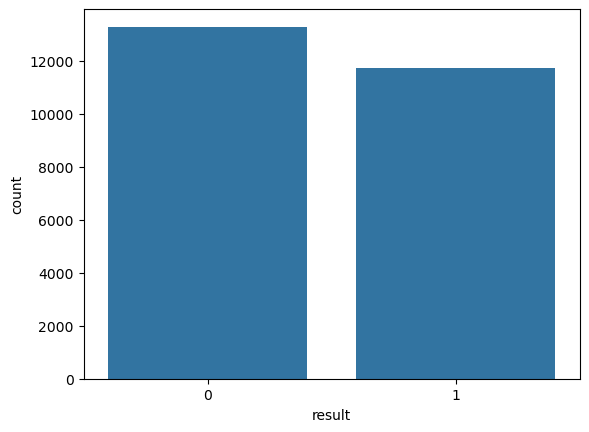

In [38]:
# Now visualize the data
sns.countplot(x=delivery_df['result'])
plt.show()


In [39]:
final_df = delivery_df[['batting_team','bowling_team','city ','runs_left',
                        'balls_left','wickets_left','total-runs_x','cur_run_rate',
                        'req_run_rate','result']]

                        ##we are taking only important columns

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total-runs_x,cur_run_rate,req_run_rate,result
0,Oval Invincibles,Manchester Originals,London,146,99.0,10,146,0.000000,7.373737,1
1,Oval Invincibles,Manchester Originals,London,145,98.0,10,146,2.500000,7.397959,1
2,Oval Invincibles,Manchester Originals,London,145,97.0,10,146,1.666667,7.474227,1
3,Oval Invincibles,Manchester Originals,London,139,96.0,10,146,8.750000,7.239583,1
4,Oval Invincibles,Manchester Originals,London,139,95.0,9,146,7.000000,7.315789,1


In [40]:
final_df.shape

(25001, 10)

In [41]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total-runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [42]:
# dropping of null values

final_df = final_df.dropna()

final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total-runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [43]:
final_df = final_df[final_df['balls_left'] != 0]

In [44]:
data = final_df.copy()

test = data['result']

train = data.drop(['result'],axis = 1)

train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total-runs_x,cur_run_rate,req_run_rate
0,Oval Invincibles,Manchester Originals,London,146,99.0,10,146,0.000000,7.373737
1,Oval Invincibles,Manchester Originals,London,145,98.0,10,146,2.500000,7.397959
2,Oval Invincibles,Manchester Originals,London,145,97.0,10,146,1.666667,7.474227
3,Oval Invincibles,Manchester Originals,London,139,96.0,10,146,8.750000,7.239583
4,Oval Invincibles,Manchester Originals,London,139,95.0,9,146,7.000000,7.315789


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=1)

X_train.shape,X_test.shape

((19868, 9), (4968, 9))

In [46]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city ', 'runs_left', 'balls_left',
       'wickets_left', 'total-runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [47]:
# batting team, bowling team and city are categorical columns
# they will be converted to numeric using a one-hot encoder

pipe =Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city '])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [48]:
pipe.fit(X_train,y_train)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'city '])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [49]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.626610305958132


In [50]:
pipe.predict_proba(X_test)[10]

array([0.172961, 0.827039])

In [51]:
#rf = RandomForestClassifier()
#pipe2 = Pipeline(steps=[
 #   ('step1', cf),
  #  ('step2',RandomForestClassifier())])

#pipe2.fit(X_train,y_train)
#print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

In [52]:
#pipe2.predict_proba(X_test)[10]

In [53]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))